# Straight Line Hough Transform

In [1]:
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.draw import line
# plotting modules
import matplotlib.pyplot as plt
#from matplotlib import cm, colors
%matplotlib inline

## Prepare test image

In [2]:
img = np.zeros((100, 150), dtype=bool)
img[30, ::2] = 1
img[::2, 65] = 1
img[35:45, 35:50] = 1
rr, cc = line(60, 130, 80, 10)
img[rr, cc] = 1
#rng = np.random.default_rng()
#img += rng.random(img.shape) > 0.95

## Calculate Straight Line Hough Transform

In [3]:
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 36, endpoint=False)
out, angles, d = hough_line(img, tested_angles)

## Plot Hought Accumulator and Lines

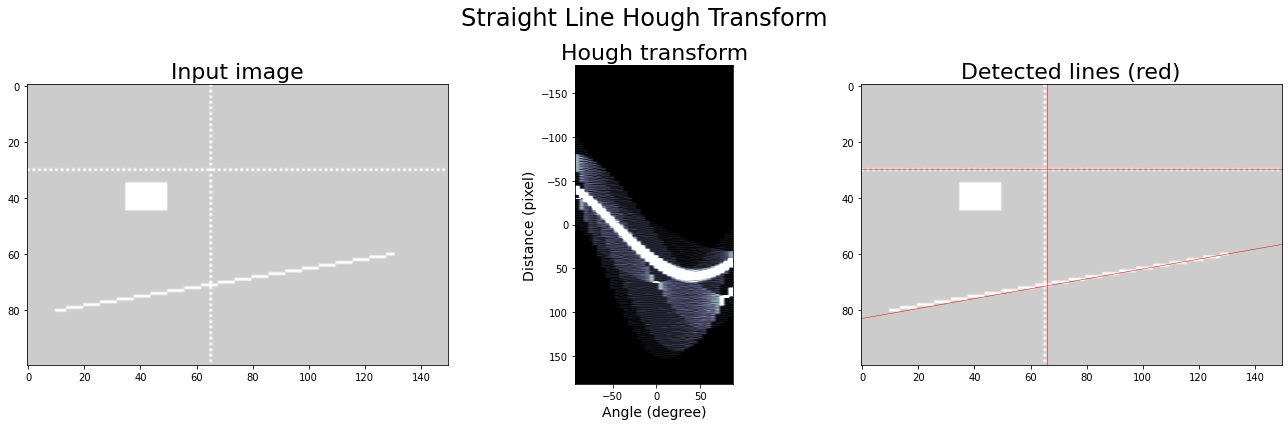

In [4]:
fix, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img, cmap=plt.cm.gray, alpha=0.2)
axes[0].set_title('Input image', fontsize=22)

angle_step = 0.5 * np.rad2deg(np.diff(angles).mean())
d_step = 0.5 * np.diff(d).mean()
bounds = (np.rad2deg(angles[0]) - angle_step,
          np.rad2deg(angles[-1]) + angle_step,
          d[-1] + d_step, d[0] - d_step)

axes[1].imshow(out, cmap=plt.cm.bone, extent=bounds, vmax=10)
axes[1].set_title('Hough transform', fontsize=22)
axes[1].set_xlabel('Angle (degree)', fontsize=14)
axes[1].set_ylabel('Distance (pixel)', fontsize=14)

axes[2].imshow(img, cmap=plt.cm.gray, alpha=0.2)
for _, angle, dist in zip(*hough_line_peaks(out, angles, d)):
    #print (_, angle, dist)
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    axes[2].axline((x0, y0), slope=np.tan(angle + np.pi/2), alpha=1, c='red', lw=0.5)
axes[2].set_title('Detected lines (red)', fontsize=22)

plt.suptitle('Straight Line Hough Transform', fontsize=24)
plt.tight_layout()
plt.savefig(f'Straight Line Hough Transform.jpg', dpi=150, pil_kwargs={'quality': 95})
plt.show()